Okay! We are going to take a look at temperatures and such.

Not sure how far I'll get with this. From Steven: looks like we are importing datetime, pandas, matplotlib, and of course snowexsql. Thanks Micah!

In [1]:
from datetime import date

import pandas as pd

import matplotlib.pyplot as plt

# Import the function to get connect to the db
from snowexsql.db import get_db
# Import for database tables in python
from snowexsql.data import LayerData, PointData, ImageData, SiteData
# Import the function to investigate a table
from snowexsql.db import get_table_attributes
# Import a useful function to format that data into a dataframe
from snowexsql.conversions import query_to_geopandas

And now we can connect to the SnowEx db:

In [2]:
# This is what you will use for all of hackweek to access the db
db_name = 'snow:hackweek@52.32.183.144/snowex'

# Using the function get_db, we receive 2 ways to interact with the database
engine, session = get_db(db_name)

Let's bring in LayerData, and look at temperature:

In [3]:
# Use the function to see what columns are available to use. 
db_columns = get_table_attributes(LayerData)

# Print out the results nicely (temperature doesn't show up here...)
print("These are the available columns in the table:\n \n* {}\n".format('\n* '.join(db_columns)))

These are the available columns in the table:
 
* bottom_depth
* comments
* date
* date_accessed
* depth
* doi
* easting
* elevation
* geom
* instrument
* latitude
* longitude
* metadata
* northing
* sample_a
* sample_b
* sample_c
* site_id
* site_name
* surveyors
* time
* time_created
* time_updated
* type
* units
* utm_zone
* value



In [5]:
# Pick a dataset
dataset = 'temperature'
# Pick a date
collection_date = date(2020, 2, 8)

# Make the query
qry = session.query(LayerData).filter(LayerData.type == dataset).filter(LayerData.date == collection_date)
# Limit it to a couple thousand (not necessary for one date)
#qry = qry.limit(2000)

# Execute the query and convert to geopandas in one handy function
df = query_to_geopandas(qry, engine)

# how many did we retrieve?
print(f'{len(df.index)} records returned!')

# Close the session to avoid hanging transactions
session.close()

107 records returned!


Now can we explore plotting?

This doesn't work well with the legend... I wonder how we could work with it?

Text(103.79735664335851, 0.5, 'Northing [m]')

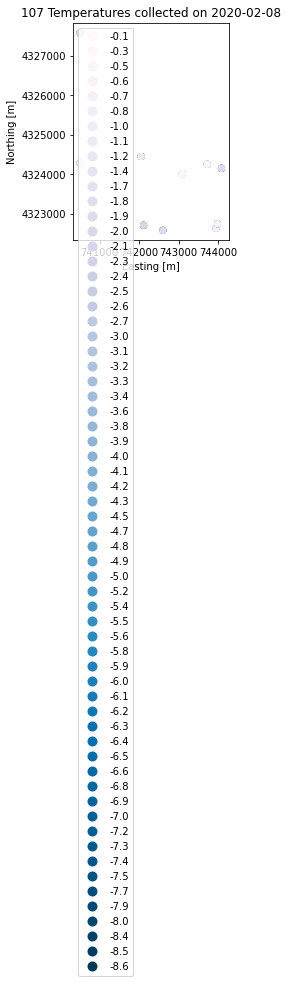

In [6]:
# Get the Matplotlib Axes object from the dataframe object, color the points by snow depth value
ax = df.plot(column='value', legend=True, cmap='PuBu')

# Use non-scientific notation for x and y ticks
ax.ticklabel_format(style='plain', useOffset=False)

# Set the various plots x/y labels and title.
ax.set_title(f'{len(df.index)} {dataset.title()}s collected on {collection_date.strftime("%Y-%m-%d")}')
ax.set_xlabel('Easting [m]')
ax.set_ylabel('Northing [m]')


Now should we try to work with airborne thermal imagery?

To do so I'll start a new session, and select image data for a specific date.

In [3]:
# This is what you will use for all of hackweek to access the db
db_name = 'snow:hackweek@52.32.183.144/snowex'

# Using the function get_db, we receive 2 ways to interact with the database
engine, session = get_db(db_name)

# Import the function to get connect to the db
from snowexsql.db import get_db
# Import for database tables in python
from snowexsql.data import LayerData, PointData, ImageData, SiteData
# Import the function to investigate a table
from snowexsql.db import get_table_attributes
# Import a useful function to format that data into a dataframe
from snowexsql.conversions import query_to_geopandas

from datetime import date

import pandas as pd

import matplotlib.pyplot as plt

NameError: name 'get_db' is not defined

In [22]:
# Use the function to see what columns are available to use. 
db_columns = get_table_attributes(ImageData)

# Print out the results nicely (temperature doesn't show up here...)
print("These are the available columns in the table:\n \n* {}\n".format('\n* '.join(db_columns)))

These are the available columns in the table:
 
* date
* date_accessed
* description
* doi
* instrument
* metadata
* raster
* site_id
* site_name
* surveyors
* time_created
* time_updated
* type
* units



Now let's learn what types,instruments, and dates are available:

In [23]:
# Get the unique datanames in the table
results = session.query(ImageData.type).distinct().all()
print('Available types = {}'.format(', '.join([r[0] for r in results])))

# Get the unique instrument in the table
results = session.query(ImageData.instrument).distinct().all()
print('\nAvailable Instruments = {}'.format(', '.join([str(r[0]) for r in results])))

# Get the unique dates in the table
results = session.query(ImageData.date).distinct().all()
print('\nAvailable Dates = {}'.format(', '.join([str(r[0]) for r in results])))


Available types = swe, DEM, insar amplitude, insar correlation, depth, insar interferogram real, insar interferogram imaginary

Available Instruments = UAVSAR, L-band InSAR, lidar

Available Dates = 2020-02-12, 2020-02-13, None, 2020-01-31, 2020-02-02


Hmmm... I don't see thermal IR in here...

In [2]:
dataset = 'swe'
# Pick a date
collection_date = date(2020, 2, 12)

# Make the query
results = session.query(ImageData).filter(ImageData.type).distinct().all()
print('\nAvailable Types = {}'.format(', '.join([str(r[0]) for r in results])))




NameError: name 'date' is not defined

In [ ]:
# Pick a dataset
dataset = 'swe'
# Pick a date
collection_date = date(2020, 2, 12)

# Make the query
qry = session.query(LayerData).filter(LayerData.type == dataset).distinct().all()
# Limit it to a couple thousand (not necessary for one date)
#qry = qry.limit(2000)

# Execute the query and convert to geopandas in one handy function
df = query_to_geopandas(qry, engine)

# how many did we retrieve?
print(f'{len(df.index)} records returned!')

# Close the session to avoid hanging transactions
session.close()